## Dataset

The Breast Cancer Diagnostic dataset is available on the **UCI Machine Learning Repository** and can also be accessed through the UW CS FTP server.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features describe the properties of the cell nuclei present in the image. The three-dimensional space is described in the work by K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets".

### Attribute Information

- **ID number**
- **Diagnosis** (M = Malignant, B = Benign)
- Ten real-valued features are computed for each cell nucleus:
  - **Radius** (mean of distances from the center to points on the perimeter)
  - **Texture** (standard deviation of gray-scale values)
  - **Perimeter**
  - **Area**
  - **Smoothness** (local variation in radius lengths)
  - **Compactness** (perimeter² / area - 1.0)
  - **Concavity** (severity of concave portions of the contour)
  - **Concave points** (number of concave portions of the contour)
  - **Symmetry**
  - **Fractal dimension** ("coastline approximation" - 1)

In [91]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures


In [92]:
df = pd.read_csv("/Users/David/Documents/Projects/Breast_cancer/dataBreastCancer.csv")

In [93]:
#  Let's preview the data and its structure.
df.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [94]:
# Let's see in detail the number of rows and columns, the names of the columns, the data types of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [95]:
# Let's look at a list of the DataFrame column names.
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [96]:
# Let's quickly check how many rows and columns the DataFrame has.
df.shape

(569, 33)

In [97]:
# Display a statistical summary of numeric columns
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [98]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [99]:
# look if there are empty values
df.isnull().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [100]:
# Data Cleansing: Dropping the ID column and handling missing values
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

# Convert 'diagnosis' column to binary
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [101]:
# Looking for correlations
# We only select numerical data types for the correlation analysis
df_num = df.select_dtypes(include = ['float64', 'int64'])
# We made the correlation of the numerical attributes with the diagnosis
df_num_corr = df_num.corr()['diagnosis'][1:] 

top_features = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with diagnosis:\n{}".format(len(top_features), top_features))

There is 15 strongly correlated values with diagnosis:
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
compactness_mean        0.596534
compactness_worst       0.590998
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
Name: diagnosis, dtype: float64


Identified 15 features strongly correlated with diagnosis, including concave points_worst, perimeter_worst, and radius_worst.Strong correlations suggest these features are likely important for predicting breast cancer diagnosis. Let's see a graphic.

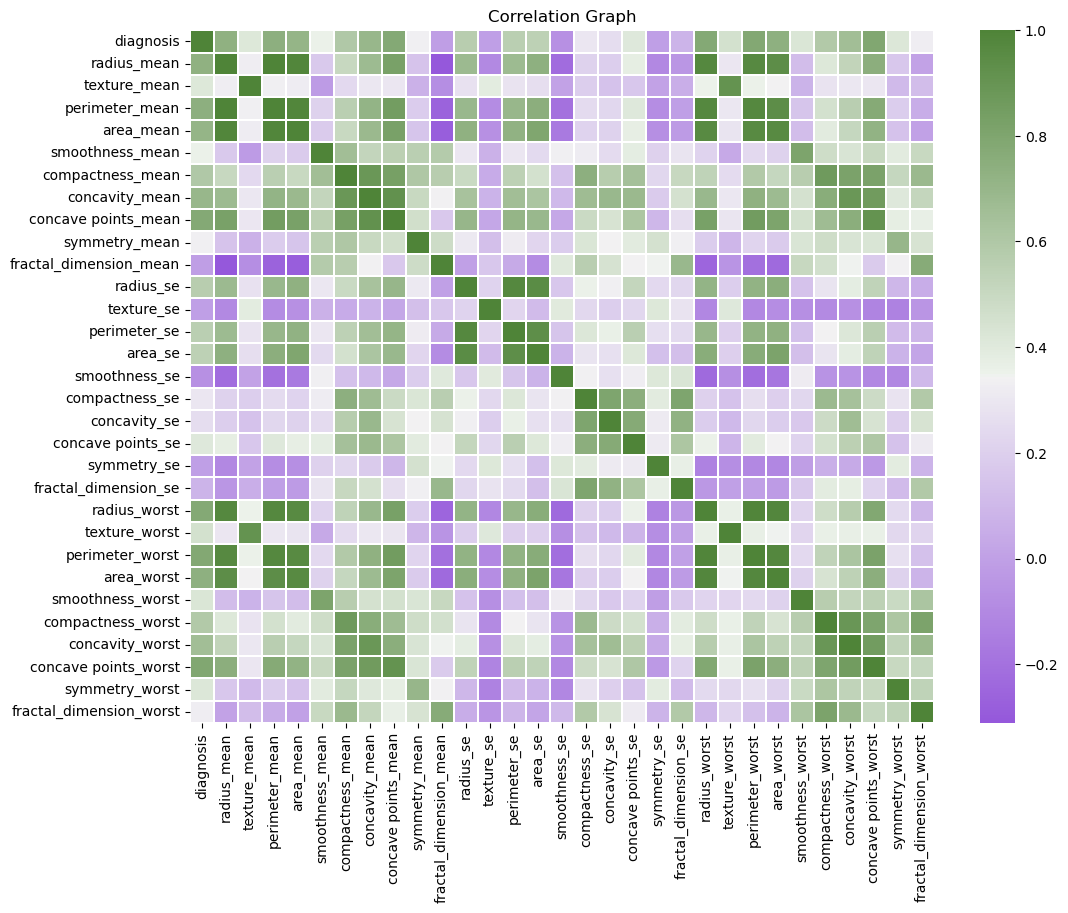

In [102]:
plt.figure(figsize=(12, 9))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(df_num.corr(), linewidths=.05, cmap=cmap);

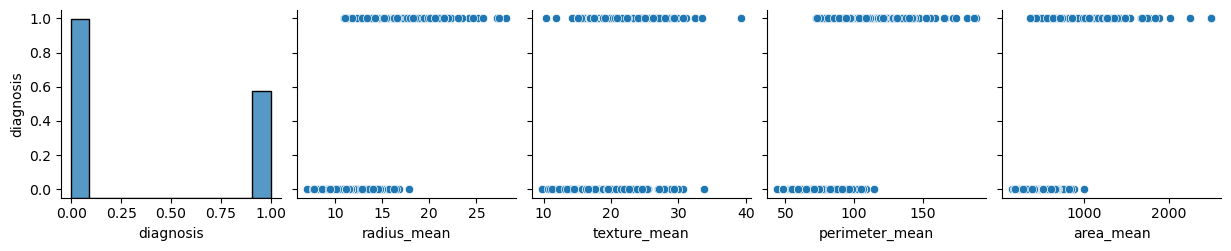

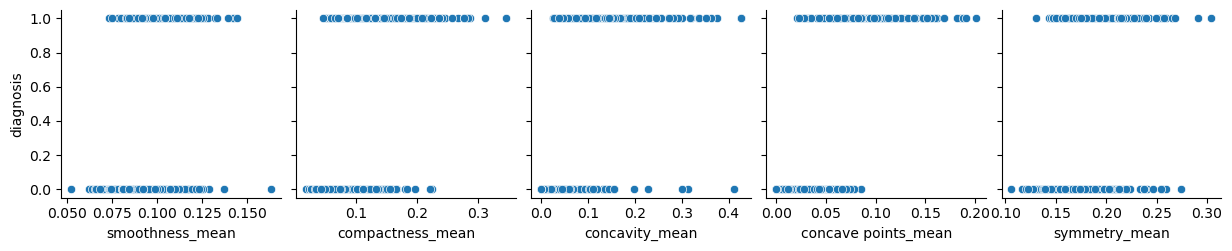

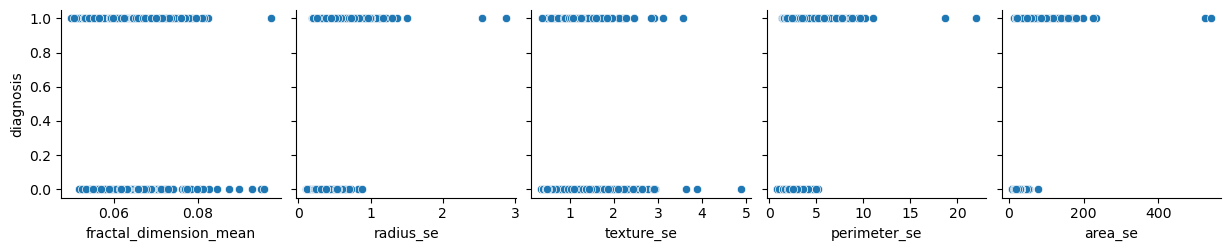

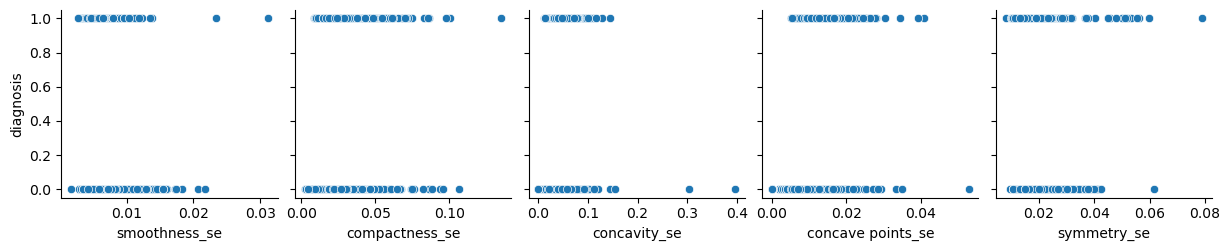

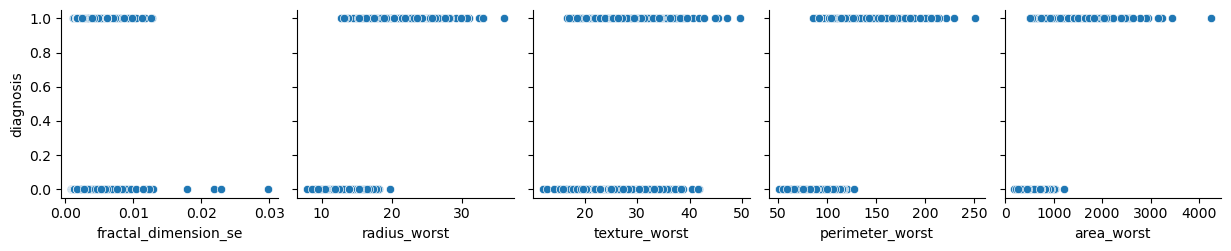

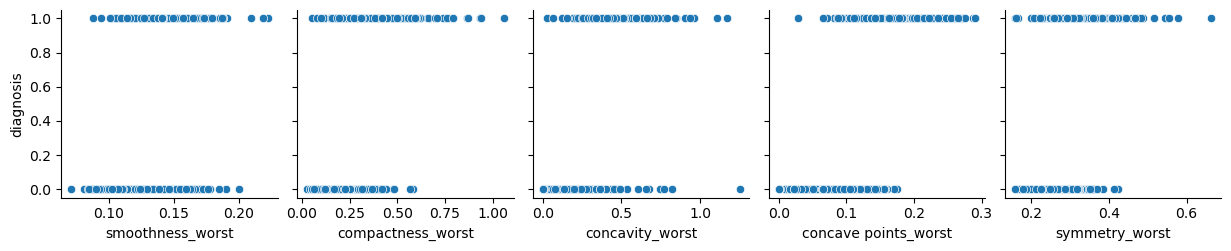

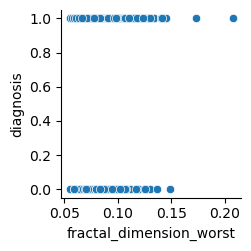

In [103]:
# We are going to iterate through the columns of the DataFrame, the loop starts from 0 and goes up to the 
# length of the columns, incrementing by 5 in each iteration.

# The `data` parameter is set to `df_num`, which is the DataFrame containing the numeric columns.
# The `x_vars` parameter is set to `df_num.columns[i:i+5]`, which selects the 5 columns starting from index `i`.
#  The `y_vars` parameter is set to `['diagnosis']`, which specifies that the target variable is `diagnosis`.

for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['diagnosis'])

In [104]:
# Create a list of float colums to check for skewing
mask = df.dtypes == float
float_cols = df.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = df[float_cols].skew()

In [105]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

Skew
area_se                  5.447186
concavity_se             5.110463
fractal_dimension_se     3.923969
perimeter_se             3.443615
radius_se                3.088612
smoothness_se            2.314450
symmetry_se              2.195133
compactness_se           1.902221
area_worst               1.859373
fractal_dimension_worst  1.662579
texture_se               1.646444
area_mean                1.645732
compactness_worst        1.473555
concave points_se        1.444678
symmetry_worst           1.433928
concavity_mean           1.401180
fractal_dimension_mean   1.304489
compactness_mean         1.190123
concave points_mean      1.171180
concavity_worst          1.150237
perimeter_worst          1.128164
radius_worst             1.103115
perimeter_mean           0.990650
radius_mean              0.942380

In [106]:
# Perform the skew transformation:

for col in skew_cols.index.values:
    if col == "diagnosis":
        continue
    df[col] = df[col].apply(np.log1p)

### Pair plot of features
Now that we have a nice, filtered dataset, let's generate visuals to better understand the target and feature-target relationships: pairplot is great for this!

In [107]:
smaller_df= df.loc[:,['concave points_worst', 'perimeter_worst', 'concave points_mean', 
                      'radius_worst', 'perimeter_mean', 'area_worst', 
                      'radius_mean', 'area_mean', 'concavity_mean', 
                      'concavity_worst','compactness_mean', 'compactness_worst', 'diagnosis']]

In [108]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   concave points_worst  569 non-null    float64
 1   perimeter_worst       569 non-null    float64
 2   concave points_mean   569 non-null    float64
 3   radius_worst          569 non-null    float64
 4   perimeter_mean        569 non-null    float64
 5   area_worst            569 non-null    float64
 6   radius_mean           569 non-null    float64
 7   area_mean             569 non-null    float64
 8   concavity_mean        569 non-null    float64
 9   concavity_worst       569 non-null    float64
 10  compactness_mean      569 non-null    float64
 11  compactness_worst     569 non-null    float64
 12  diagnosis             569 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 57.9 KB


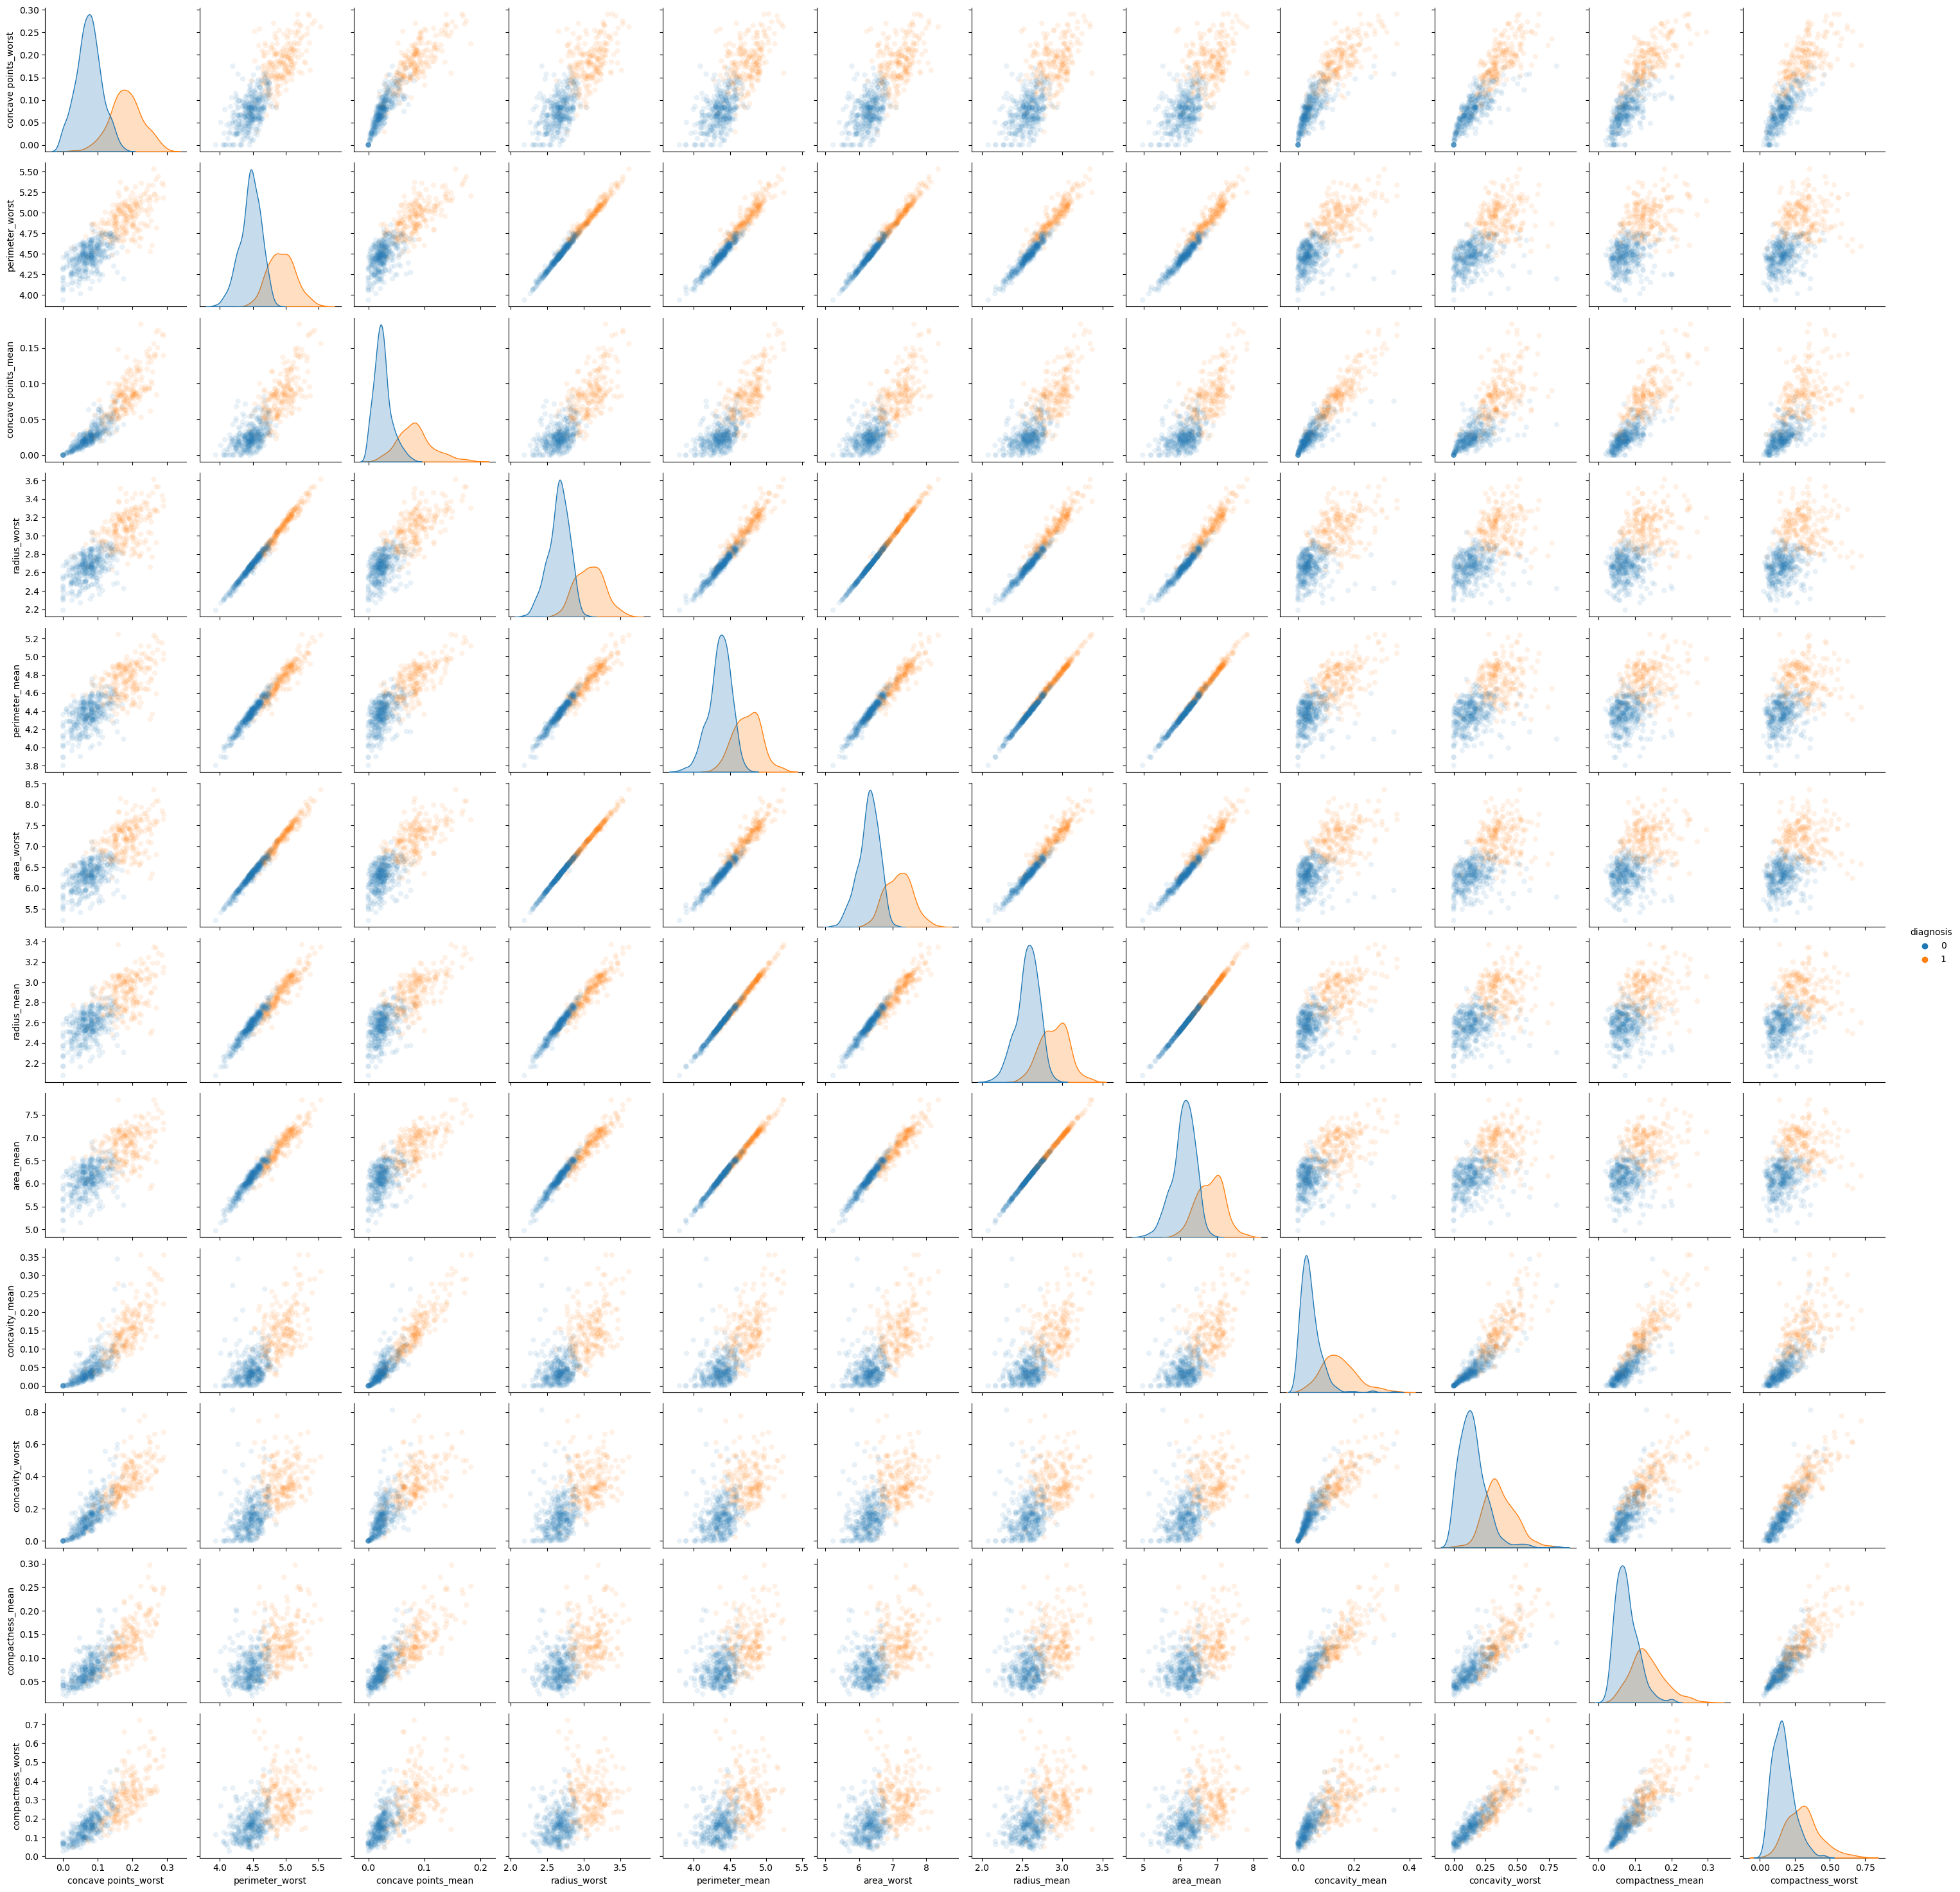

In [109]:
sns.pairplot(smaller_df, plot_kws=dict(alpha=.1, edgecolor='none'), hue="diagnosis")

This pair plot shows clear distinctions between benign and malignant cases for certain features.

In [110]:
# Creating interaction features manually
df['radius_texture_interaction'] = df['radius_mean'] * df['texture_mean']
df['radius_perimeter_interaction'] = df['radius_mean'] * df['perimeter_mean']

# Check the newly created features
df[['radius_mean', 'texture_mean', 'radius_texture_interaction', 'perimeter_mean', 'radius_perimeter_interaction']].head()

radius_mean  texture_mean  radius_texture_interaction  perimeter_mean  \
0     2.943913         10.38                   30.557812        4.818667   
1     3.071303         17.77                   54.577062        4.897093   
2     3.029650         21.25                   64.380073        4.875197   
3     2.519308         20.38                   51.343499        4.364117   
4     3.058237         14.34                   43.855125        4.913390   

   radius_perimeter_interaction  
0                     14.185735  
1                     15.040459  
2                     14.770144  
3                     10.994556  
4                     15.026313

In [111]:
# Selecting the features to be transformed
features = df[['radius_mean', 'texture_mean', 'perimeter_mean']]

# Creating polynomial features (degree=2 includes squared terms and interaction terms)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(features)

# Converting the polynomial features into a DataFrame for better readability
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(features.columns))

# Check the newly created polynomial features
poly_features_df.head()

radius_mean  texture_mean  perimeter_mean  radius_mean^2  \
0     2.943913         10.38        4.818667       8.666621   
1     3.071303         17.77        4.897093       9.432905   
2     3.029650         21.25        4.875197       9.178782   
3     2.519308         20.38        4.364117       6.346913   
4     3.058237         14.34        4.913390       9.352816   

   radius_mean texture_mean  radius_mean perimeter_mean  texture_mean^2  \
0                 30.557812                   14.185735        107.7444   
1                 54.577062                   15.040459        315.7729   
2                 64.380073                   14.770144        451.5625   
3                 51.343499                   10.994556        415.3444   
4                 43.855125                   15.026313        205.6356   

   texture_mean perimeter_mean  perimeter_mean^2  
0                    50.017767         23.219555  
1                    87.021347         23.981522  
2                   103.597943         23.767549  
3                    88.940709         19.045519  
4                    70.458011         24.141400

In [112]:
df = pd.concat([df, poly_features_df], axis=1)

In [113]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1     2.943913         10.38        4.818667   6.909753   
1          1     3.071303         17.77        4.897093   7.190676   
2          1     3.029650         21.25        4.875197   7.093405   
3          1     2.519308         20.38        4.364117   5.958683   
4          1     3.058237         14.34        4.913390   7.168580   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840          0.244983        0.262441             0.137237   
1          0.08474          0.075701        0.083330             0.067818   
2          0.10960          0.148334        0.180153             0.120357   
3          0.14250          0.249902        0.216240             0.100026   
4          0.10030          0.124692        0.180653             0.099212   

   symmetry_mean  ...  radius_perimeter_interaction  radius_mean  \
0         0.2419  ...                     14.185735     2.943913   
1         0.1812  ...                     15.040459     3.071303   
2         0.2069  ...                     14.770144     3.029650   
3         0.2597  ...                     10.994556     2.519308   
4         0.1809  ...                     15.026313     3.058237   

   texture_mean  perimeter_mean  radius_mean^2  radius_mean texture_mean  \
0         10.38        4.818667       8.666621                 30.557812   
1         17.77        4.897093       9.432905                 54.577062   
2         21.25        4.875197       9.178782                 64.380073   
3         20.38        4.364117       6.346913                 51.343499   
4         14.34        4.913390       9.352816                 43.855125   

   radius_mean perimeter_mean  texture_mean^2  texture_mean perimeter_mean  \
0                   14.185735        107.7444                    50.017767   
1                   15.040459        315.7729                    87.021347   
2                   14.770144        451.5625                   103.597943   
3                   10.994556        415.3444                    88.940709   
4                   15.026313        205.6356                    70.458011   

   perimeter_mean^2  
0         23.219555  
1         23.981522  
2         23.767549  
3         19.045519  
4         24.141400  

[5 rows x 42 columns]

In [114]:
print(df.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst',
       'radius_texture_interaction', 'radius_perimeter_interaction',
       'radius_mean', 'texture_mean', 'perimeter_mean', 'radius_mean^2',
       'radius_mean texture_mean', 'radius_mean perimeter_mean',
       'texture_mean^2', 'texture_mean perimeter_mean', 'perimeter_mean^2'],
      dtype='object')


In [115]:
# Calculate the correlation of the new features with the target
new_feature_columns = ['radius_texture_interaction', 'radius_perimeter_interaction'] + list(poly_features_df.columns)
corr_matrix = df[new_feature_columns + ['diagnosis']].corr()

# Display correlations with the target variable
corr_with_target = corr_matrix['diagnosis'].sort_values(ascending=False)
print(corr_with_target)

diagnosis                       1.000000
perimeter_mean^2                0.745013
perimeter_mean                  0.741996
perimeter_mean                  0.741996
radius_perimeter_interaction    0.737380
radius_mean perimeter_mean      0.737380
radius_mean^2                   0.732017
radius_mean                     0.727980
radius_mean                     0.727980
radius_texture_interaction      0.592110
radius_mean texture_mean        0.592110
texture_mean perimeter_mean     0.548627
texture_mean                    0.415185
texture_mean                    0.415185
texture_mean^2                  0.387204
Name: diagnosis, dtype: float64


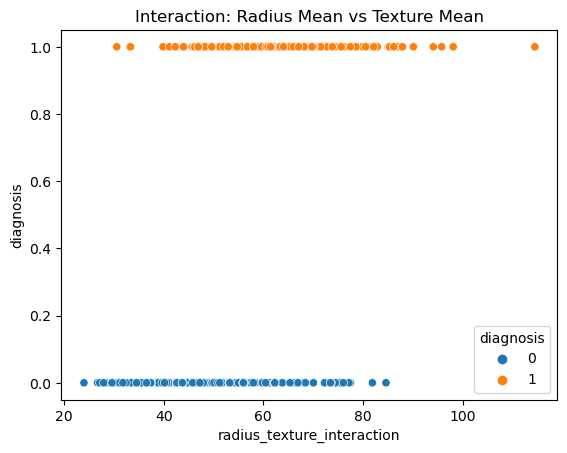

In [116]:
# Scatter plot for interaction features
sns.scatterplot(x='radius_texture_interaction', y='diagnosis', data=df, hue='diagnosis')
plt.title('Interaction: Radius Mean vs Texture Mean')
plt.show()

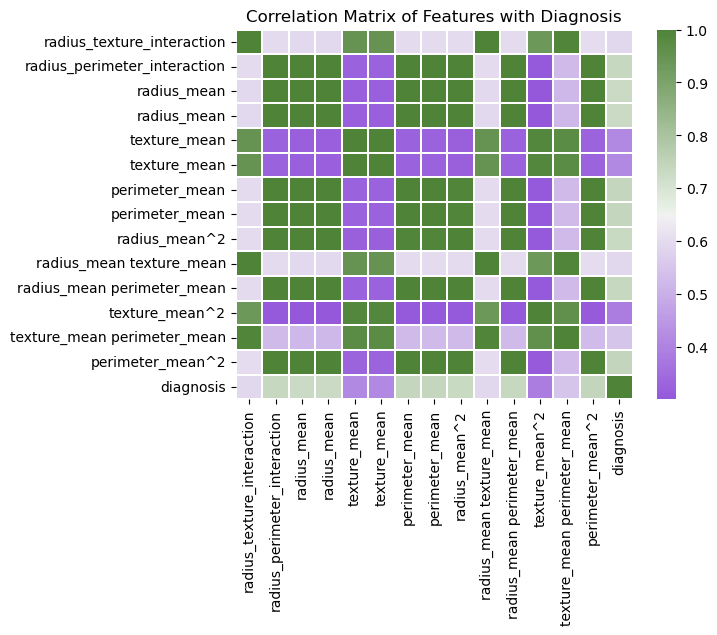

In [117]:
# Heatmap for the correlation matrix
plt.title('Correlation Matrix of Features with Diagnosis')
cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(corr_matrix, linewidths=.05, cmap=cmap);

### **Hypothesis Testing**

**Null Hypothesis (H₀):** There is no difference in the mean radius_mean between malignant and benign tumors.

**Alternative Hypothesis (H₁):** There is a significant difference in the mean radius_mean between malignant and benign tumors.

In [118]:
from scipy.stats import ttest_ind

# Splitting the data based on diagnosis
malignant = df[df['diagnosis'] == 1]['radius_mean']
benign = df[df['diagnosis'] == 0]['radius_mean']

# Performing the t-test
t_stat, p_value = ttest_ind(malignant, benign)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: [25.28371353 25.28371353], P-value: [5.17402002e-95 5.17402002e-95]


* Reject the Null Hypothesis (H₀): Given the extremely low p-value, we can reject the null hypothesis, which stated that there is no difference in the mean radius_mean between malignant and benign tumors. There is a statistically significant difference in the mean radius_mean between malignant and benign tumors. 
* This result suggests that radius_mean is a strong indicator that can help distinguish between malignant and benign tumors. This feature could be very useful in building predictive models for breast cancer diagnosis.